# Mohamed Salama
#### Sparks Foundation Computer vision Internship
#### Task 2 : Colors Identification in images


Importing libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Raed Images

In [3]:
def get_images():
    images = []
    for i in range (1,5):
        image = cv2.imread('images/image'+str(i)+'.jpg')
        images.append(image)
    return images


Show images and colors charts

In [4]:
def show_images_with_chart(image , vals , hex , i):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Example '+str(i+1))
    ax1.imshow(image)
    plt.pie(vals, labels = hex, colors = hex)

Preprocess images

In [5]:
def preprocess_images (images):
    modified_images = []
    for i in range(len(images)):
        images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        modified_image = cv2.resize(images[i], (600, 400), interpolation = cv2.INTER_AREA)
        modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
        modified_images.append(modified_image)
    return modified_images

Clustering image colors

In [6]:
def get_colors (image , number_of_colors):
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    return rgb_colors,hex_colors ,counts.values()

Main function

In [7]:
def main ():
    images = get_images()
    preprocessed_images = preprocess_images(images)
    plt.figure()
    for i in range(len(preprocessed_images)):
        rgb , hex,vals = get_colors(preprocessed_images[i],8)
        show_images_with_chart(images[i],vals,hex , i)
    return


        

Testing the code

<Figure size 432x288 with 0 Axes>

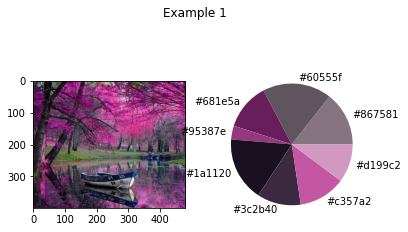

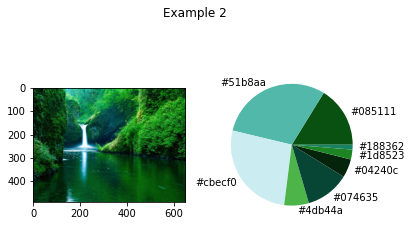

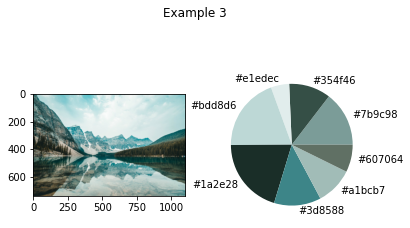

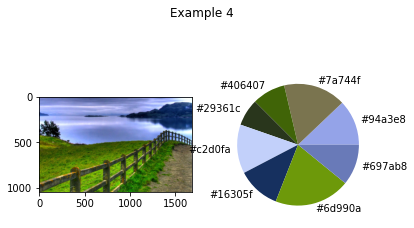

In [8]:
main()

#                                                      **Thank You**